In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


In [13]:
import os
import pandas as pd
import numpy as np

class Attribute:
    def __init__(self, p='/vagrant/imgs/list_attr_celeba.csv'):
        self.df = pd.read_csv(p)

    def mod_image_path(self, image_path):
        if 'png' in image_path:
            return image_path.replace('png', 'jpg')
        return image_path

    def _get_row(self, image_path):
        image_path = self.mod_image_path(image_path)
        return self.df.loc[self.df['image_id'] == image_path]		

    def get_attributes_list(self, image_path):
        row = self._get_row(image_path)
        # print(row.values.tolist())
#         i = row.values.tolist()[0][1:]
#         l =[[i]]
#         n = np.array(l)
#         r = n.reshape(len(i), 1, 1)
#         return l
        return row.values.tolist()[0][1:]
    def get_attributes_np(self, image_path):
        row = self._get_row(image_path)
        n = row.values[0][1:]
        print (n.shape)
        return row.values[0][1:]

    def get_attribute_row(self, image_path):
        return self._get_row(image_path)

In [14]:
a = Attribute()

In [4]:
p = '/vagrant/imgs/training_data/training_data/aligned'
d = os.listdir(p)

In [9]:
import cv2
images = []
for im_path in d[:4000]:
    image = cv2.imread(os.path.join(p, im_path))
    images.append(image)
images = np.array(images)
print(images.shape)

(4000, 95, 95, 3)


In [10]:
images = images / 255

In [11]:
train_X, test_X = images[:3000], images[3000:]
train_X, val_X = train_X[:2000], train_X[2000:]

In [12]:
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)

(2000, 95, 95, 3)
(1000, 95, 95, 3)
(1000, 95, 95, 3)


In [15]:
labels = np.array([a.get_attributes_list(img_path) for img_path in d[:4000]])

In [16]:
print(labels.shape)

(4000, 40)


In [21]:
labels[labels < 0] = 0

In [22]:
train_Y, test_Y = labels[:3000], labels[3000:]
train_Y, val_Y = train_Y[:2000], train_Y[2000:]
print(train_Y.shape)
print(val_Y.shape)
print(test_Y.shape)

(2000, 40)
(1000, 40)
(1000, 40)


In [43]:
print(test_Y)

[[0 0 1 ... 0 0 1]
 [0 1 1 ... 1 0 1]
 [0 0 1 ... 0 0 1]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 1]]


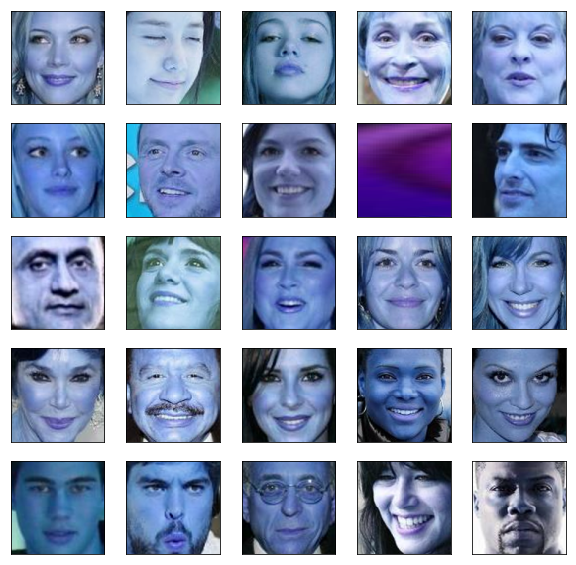

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]])

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(95, 95, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(40, activation=tf.nn.softmax)
])

In [34]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
history = model.fit(train_X,
                    train_Y,
                    epochs=40,
                    batch_size=512,
                    validation_data=(val_X, val_Y),
                    verbose=1)

Train on 2000 samples, validate on 1000 samples
Epoch 1/40
2000/2000 [==============================] - 1s 648us/step - loss: 2.7326 - acc: 0.7706 - val_loss: 3.8130 - val_acc: 0.7629
Epoch 2/40
2000/2000 [==============================] - 1s 440us/step - loss: 3.7201 - acc: 0.7684 - val_loss: 3.8060 - val_acc: 0.7629
Epoch 3/40
2000/2000 [==============================] - 1s 430us/step - loss: 3.5627 - acc: 0.7669 - val_loss: 3.6102 - val_acc: 0.7630
Epoch 4/40
2000/2000 [==============================] - 1s 461us/step - loss: 3.5016 - acc: 0.7654 - val_loss: 3.6268 - val_acc: 0.7631
Epoch 5/40
2000/2000 [==============================] - 1s 444us/step - loss: 3.5125 - acc: 0.7686 - val_loss: 3.6492 - val_acc: 0.7556
Epoch 6/40
2000/2000 [==============================] - 1s 443us/step - loss: 3.4865 - acc: 0.7685 - val_loss: 3.4779 - val_acc: 0.7676
Epoch 7/40
2000/2000 [==============================] - 1s 439us/step - loss: 3.4052 - acc: 0.7614 - val_loss: 3.5069 - val_acc: 0.7494


In [36]:
results = model.evaluate(test_X, test_Y)

print(results)

1000/1000 [==============================] - 0s 240us/step
[2.6682908496856688, 0.7699750037193298]


In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

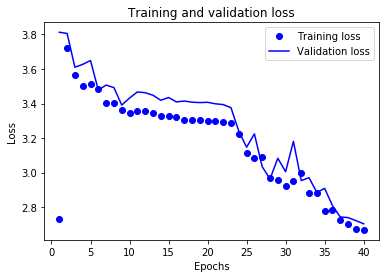

In [41]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

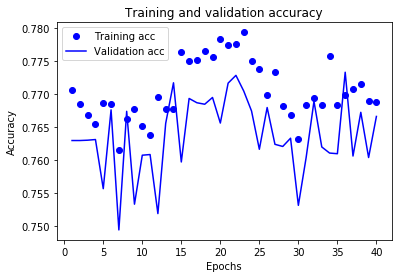

In [42]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()